앞선 실습에서 익힌 기능들이 실제 전처리 모듈에 쓰이는 방식을 살펴봅니다.


먼저 필요한 모듈들을 import합니다.

In [8]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

입력데이터와 출력데이터를 모아놓을 디렉터리를 하나씩 만듭니다.

In [9]:
input_dir = 'data_raw' # 아무런 처리를 거치지 않은 날 것의 데이터를 의미합니다.
output_dir = 'data_preprocessed' # 전처리가 된 데이터를 의미합니다.

os.mkdir(input_dir) 
os.mkdir(output_dir) 

FileExistsError: ignored

전처리 하고 싶은 사진 몇 장을 Colab에 업로드해서 input_path 디렉터리에 넣어주세요

이후 os.listdir 함수로 해당 디렉터리를 읽어 존재하는 파일들의 경로들을 리스트로 반환받습니다.

In [13]:
file_list_input = os.listdir(input_dir)

print(file_list_input)

['lenna.jpg']


이미지가 아닌 파일들을 제거합니다.


파이썬에서는 문자열을 마치 리스트 다루듯 Indexing할 수 있습니다.


이미지인 파일들은 파일명의 마지막 네 글자가 '.jpg' 혹은 '.png' 혹은 '.JPG' 혹은 '.PNG'일 것입니다.

In [14]:
new_file_list_input = []

for filename in file_list_input:
  if filename[-4:] == '.jpg' or filename[-4:] == '.png' or filename[-4:] == '.JPG' or filename[-4:] == '.PNG':
    new_file_list_input.append(filename)

file_list_input = new_file_list_input

print(file_list_input)

['lenna.jpg']


이미지를 입력받으면 비율을 유지하면서 resize해서 반환하는 함수를 만듭니다.

In [15]:
def resize(img):
  h = img.shape[0]
  w = img.shape[1]

  if h > w:
    return cv2.resize(img, (256, int(h / w * 256)), interpolation = cv2.INTER_LINEAR)
  else:
    return cv2.resize(img, (int(w / h * 256), 256), interpolation=cv2.INTER_LINEAR)

이미지를 입력받으면 해당 이미지로부터 좌상단, 좌하단, 우상단, 우하단, 중앙으로 227x227만큼 잘라낸 이미지를 각각 5개 만든 뒤, 

이들 각각을 좌우로 뒤집은 이미지를 하나씩 더 만들어, 입력이미지를 총 10배로 불려주는 함수를 만듭니다.

In [16]:
def crop_flip(img):
  h = img.shape[0]
  w = img.shape[1]

  ####left_top
  lt = img[:227, :227, :]
  ####right_top
  rt = img[:227, w - 227:, :]
  ####left_bottom
  lb = img[h - 227:, :227, :]
  ####right_bottom
  rb = img[h - 227:, w - 227:, :]
  ####center
  c = img[h//2 - 113:h//2 + 114, w//2 - 113:w//2 + 114, :]

  return [lt, cv2.flip(lt, 1), rt, cv2.flip(rt, 1), lb, cv2.flip(lb, 1), rb, cv2.flip(rb, 1), c, cv2.flip(c, 1)]

이 함수가 제대로 동작하는지 한 번 예제 이미지를 하나 돌려봅시다.

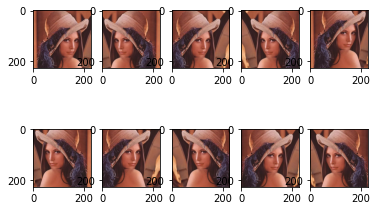

In [18]:
# img = cv2.imread('파일명')
img = cv2.imread('data_raw/lenna.jpg')
img_resized = resize(img)
img_list = crop_flip(img_resized)

fig, ax = plt.subplots(2, 5)
# plt.subplot은 한 figure위에 여러 이미지나 plot을 띄울 수 있게 해줍니다. 
# 5 x 2개 만큼의 subplot을 만듭니다.
for i in range(10):
  y = i // 5 # y축
  x = i % 5  # x축

  img_RGB = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB)# 이미지를 띄우기 전 RGB로 바꿔줍니다.
  ax[y, x].imshow(img_RGB)

plt.show() 

제대로 돌아가는 것을 확인했으면 이제 이를 전체 이미지에 반복해주기만 하면 됩니다.

전처리를 완료한 이미지는 이미 만들어 놓은 data_preprocessed 디렉터리에 저장합니다.

In [19]:
for filename in file_list_input:
  input_path = os.path.join(input_dir, filename)
  # data_raw 디렉터리에 속한 파일이므로 경로명을 합쳐줍니다.
  img = cv2.imread(input_path)
  # 파일을 읽어옵니다.
  img_list = crop_flip(resize(img))
  # 전처리를 수행해 이미지를 10배로 불립니다.

  for i in range(len(img_list)):
    output_path = os.path.join(output_dir, '%s%1d.jpg' % (filename[:-4], i))
    # data_output 디렉터리 밑에, 원래 파일명 끝에 0부터 9까지의 숫자를 뒤에 붙여서 경로명을 만듭니다.
    cv2.imwrite(output_path, img_list[i])
    # 해당 경로에 이미지를 파일로 저장합니다.

data_preprocessed 디렉터리를 열어서 데이터가 제대로 전처리되었는지 확인해 봅니다.

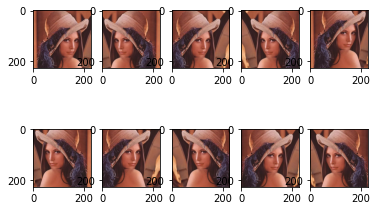

In [21]:
# img = cv2.imread('파일명')
img = cv2.imread('data_raw/lenna.jpg')
img_resized = resize(img)
img_list = crop_flip(img_resized)

fig, ax = plt.subplots(2, 5)
# plt.subplot은 한 figure위에 여러 이미지나 plot을 띄울 수 있게 해줍니다. 
# 5 x 2개 만큼의 subplot을 만듭니다.
for i in range(10):
  y = i // 5 # y축
  x = i % 5  # x축

  img_RGB = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB)# 이미지를 띄우기 전 RGB로 바꿔줍니다.
  ax[y, x].imshow(img_RGB)

plt.show() 